In [1]:
import pandas as pd
import matplotlib.pyplot as plt
sales_df = pd.read_csv("C:/Term 3/Supervised learning with python/Codes-Data-Files/Machine Learning (Codes and Data Files)/Data/Advertising.csv")

In [2]:
sales_df.info() #here we can see there are no null values in data. We just have to standardize the features because we will be running
#linear regression model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [3]:
X = sales_df[['TV','Radio','Newspaper']]
Y = sales_df['Sales']

In [4]:
#standardizing the feature set
Y = ((Y-Y.mean())/Y.std())
X = X.apply(lambda rec: (rec-rec.mean())/rec.std(),axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales_df[['TV','Radio','Newspaper']],sales_df.Sales,test_size=0.3, random_state=42)


In [6]:
print(f"train size is {len(X_train)}")
print(f"test size is {len(X_test)}")

train size is 140
test size is 60


In [7]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [8]:
print(f"Intercept is {linreg.intercept_}")
print(f"Coefficents are {linreg.coef_}")

Intercept is 2.70894909251591
Coefficents are [0.04405928 0.1992875  0.00688245]


In [9]:
#predicting y_test
y_pred = linreg.predict(X_test)

In [10]:
import numpy as np
test_pred_df = pd.DataFrame({'actual':y_test, "predicted":np.round(y_pred,2), "residual":y_test-y_pred})
test_pred_df.head()

,actual,predicted,residual
95,16.9,16.57,0.334604
15,22.4,21.19,1.211772
30,21.4,21.55,-0.151071
158,7.3,10.89,-3.589238
128,24.7,22.20,2.497680


In [11]:
from sklearn import metrics
r2 = metrics.r2_score(y_train,linreg.predict(X_train)) #calculating r-square value to understand the percentage of variance explained by model
r2

0.9055159502227753

In [12]:
mse = metrics.mean_squared_error(y_train,linreg.predict(X_train))
mse

2.4793551789057866

## Bias Variance Trade off

In [13]:
df = pd.read_csv("C:/Term 3/Supervised learning with python/Codes-Data-Files/Machine Learning (Codes and Data Files)/Data/curve.csv")
df.head()

,x,y
0,2,-1.999618
1,2,-1.999618
2,8,-3.978312
3,9,-1.969175
4,10,-0.957770


In [14]:
import numpy as np
import seaborn as sn
def poly_fit(x,y,degree = 1):
    p = np.polyfit(x,y,degree)
    pred = np.polyval(p,x)
    plt.scatter(x,y)
    return plt.plot(x,pred,label=pred)

Text(0, 0.5, 'y values')

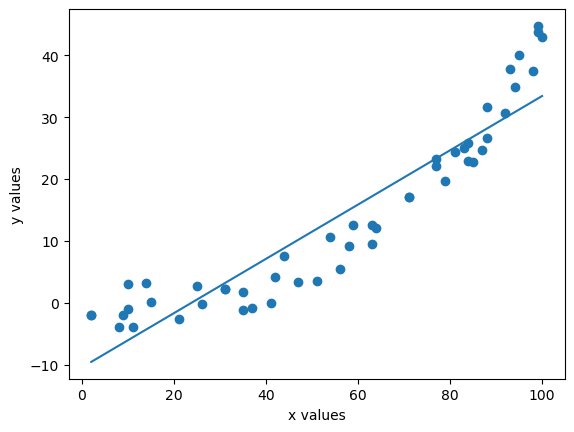

In [15]:
poly_fit(df['x'],df['y'],1)
plt.xlabel("x values")
plt.ylabel("y values")

Text(0, 0.5, 'y values')

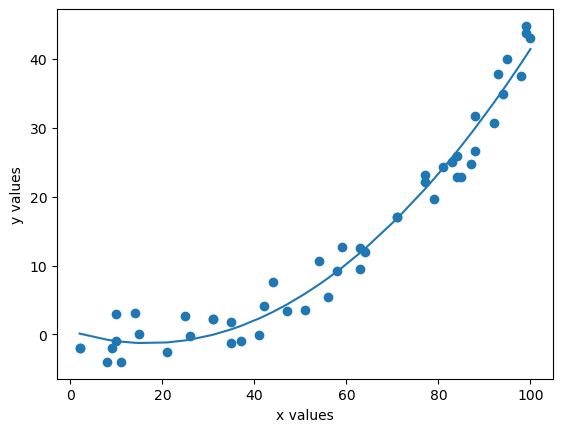

In [16]:
poly_fit(df['x'],df['y'],2)
plt.xlabel("x values")
plt.ylabel("y values")

Text(0, 0.5, 'y values')

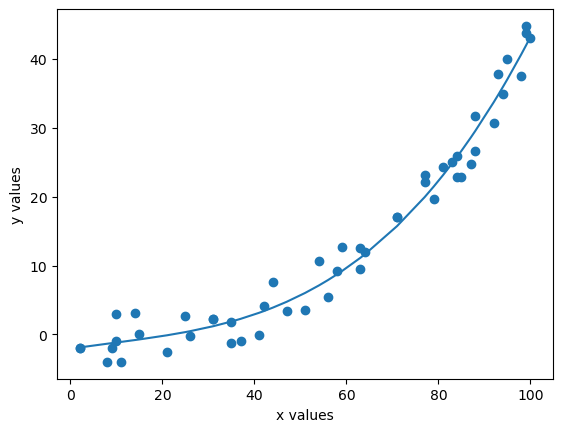

In [17]:
poly_fit(df['x'],df['y'],3)
plt.xlabel("x values")
plt.ylabel("y values")

Text(0, 0.5, 'y values')

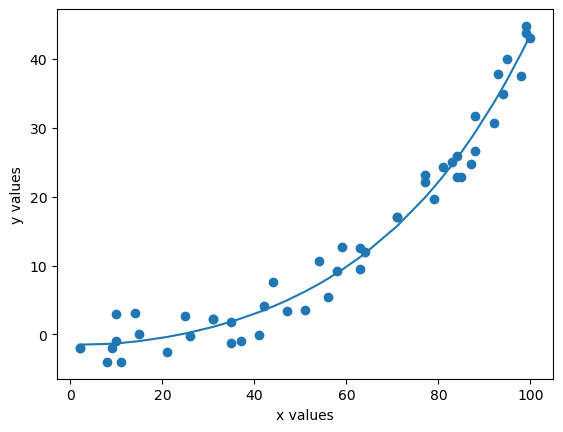

In [18]:
poly_fit(df['x'],df['y'],4)
plt.xlabel("x values")
plt.ylabel("y values")

Text(0, 0.5, 'y values')

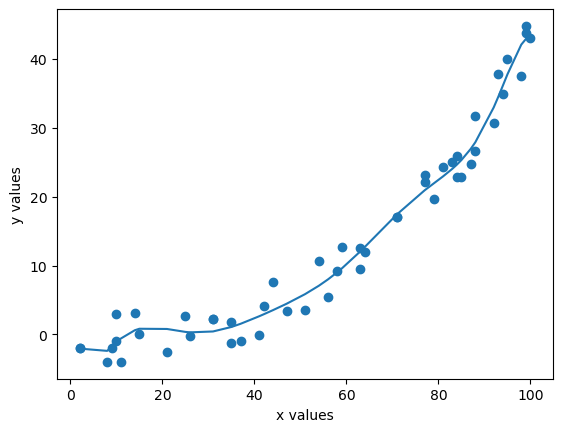

In [19]:
poly_fit(df['x'],df['y'],10)
plt.xlabel("x values")
plt.ylabel("y values")

In [20]:
train_X, test_X, train_y, test_y = train_test_split(df['x'],df['y'],test_size=0.4,random_state=42)


In [21]:
rmse_df = pd.DataFrame(columns = ["degree","rmse_train","rmse_test"])
for i in range(1,16):
    p = np.polyfit(train_X,train_y,i)
    pred_train = np.polyval(p,train_X)
    pred_test = np.polyval(p,test_X)
    rmse_df.loc[i-1] = [i,metrics.mean_squared_error(train_y,pred_train),metrics.mean_squared_error(test_y,pred_test)]
    
rmse_df

,degree,rmse_train,rmse_test
0,1.0,28.686424,33.606746
1,2.0,5.525032,7.779155
2,3.0,4.840787,6.608862
3,4.0,4.713688,7.493848
4,5.0,4.455025,7.120342
5,6.0,4.454537,7.158383
6,7.0,4.444254,6.999790
7,8.0,4.440262,7.103299
8,9.0,4.088054,7.000006
9,10.0,3.987863,7.753741


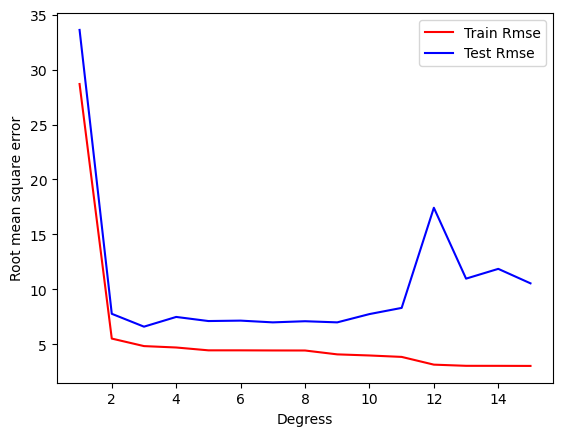

In [22]:
plt.plot(rmse_df['degree'],rmse_df['rmse_train'],label = "Train Rmse",color='r')
plt.plot(rmse_df['degree'],rmse_df['rmse_test'],label = "Test Rmse",color='b')
plt.legend()
plt.xlabel("Degress")
plt.ylabel("Root mean square error")
plt.show()

we can see that beyond certain complexity error on test error started to rise and train error started to decrease this happens becaus of over fitting